(Matplotlib)=
# Plotting data with Matplotlib
[<!-- module-prog badge --><span class="module module-prog">Programming for Geoscientists</span>](module-prog) [<!-- module-dsml badge --><span class="module module-dsml">Data Science and Machine Learning for Geoscientists</span>](module-dsml) 
``` {index} Matplotlib (Python)
```
``` {thebe-button} Tun on live code
```
[Matplotlib](https://matplotlib.org/) is a commonly used Python library for plotting data. Matplotlib functions are not built-in so we need to import it every time we want to plot something. The convention is to import `matplotlib.pyplot` as `plt`, however, any prefix can be used:

In [2]:
import matplotlib.pyplot as plt

# Import other libraries to generate data
import numpy as np

Matplotlib functions usually return something, but in most cases you can have them as statements on their own as they update the object (plot) itself.

## Useful graph generation functions
- `plt.plot(xdata, ydata, format, _kwargs_)` - plots [point data](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) that can be either markers or joined by lines. The most commonly used graph type.
- `plt.scatter(xdata, ydata, *kwargs*)` - a [scatter plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) of ydata vs. xdata with varying marker size and/or colour.
- `plt.hist(data, _kwargs_)` - plots a [histogram](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist), `_kwargs_` include `_bins_`, i.e. the number of bins to use.

## Graph decoration functions
Graph decoration functions are used after graph generation function, and there is plenty of them in the official documentation. Useful ones are listed below:
- `plt.grid(_kwargs_)` - creates gridlines, commonly used with `plt.plot()` type plots
- `plt.legend(_kwargs_)` - create a legend in the plot, keyword arguement `_loc_` can determine legend's position, e.g. `_plt.legend(loc="upper left")_` or `_plt.legend(loc="best")_`. For documentation check [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend).
- `plt.text(x, y, text, _kwargs_)` - insert text at a specified position, `_kwargs_` include `_fontsize_`, `_style_`, `_weight_`, `_color_`.
- `plt.title(text, *kwargs*)` - sets the title.
- `plt.xlabel(text, *kwargs*)` and `plt.ylabel(text, *kwargs*)` - sets x- and y-axis labels.
- `plt.xlim(minx, maxx)` and `plt.ylim(miny, maxy)` - sets x- and y-axis limits.

## Graph finalising function
- `plt.show()` - displays the graph

## Example plots
(Line_scatter)=
### Line and scatter data

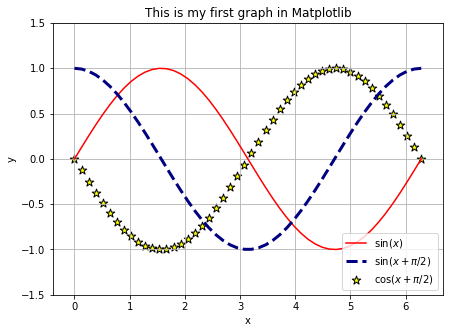

In [2]:
x = np.linspace(0, 2*np.pi, 50) # Create x values from 0 to 2pi
y1 = np.sin(x)                  # Compute y1 values as sin(x)
y2 = np.sin(x+np.pi/2)          # Compute y2 values as sin(x+pi/2)

# Create figure (optional, but can set figure size)
plt.figure(figsize=(7,5))

# Create line data
plt.plot(x, y1, label="$\sin{(x)}$", color="red")
plt.plot(x, y2, "--", label="$\sin{(x+\pi/2)}$", color="navy", linewidth=3)

# Create scatter data
y3 = np.cos(x+np.pi/2)
plt.scatter(x, y3, label="$\cos{(x+\pi/2)}$", color="yellow",
            edgecolor="black", s=80, marker="*")

# Set extra decorations
plt.title("This is my first graph in Matplotlib")
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.ylim(-1.5,1.5)

# Show the graph
plt.show()

(Histogram)=
### Histogram
``` {index} Plots: histogram
```

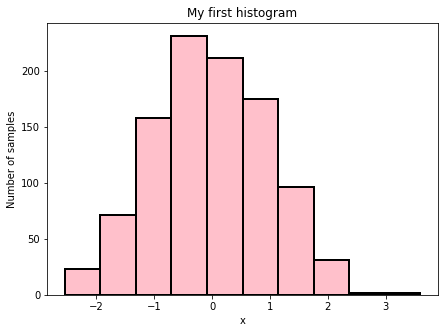

In [3]:
# Create random data with normal distribution
data = np.random.randn(1000)

# Create figure
plt.figure(figsize=(7,5))

# Plot histogram
plt.hist(data, bins=10, color="pink", edgecolor="black",
        linewidth=2)

# Add extras
plt.xlabel("x")
plt.ylabel("Number of samples")
plt.title("My first histogram")

# Display
plt.show()

(Image_plot)=
### Image plot
``` {index} Plots: image
```

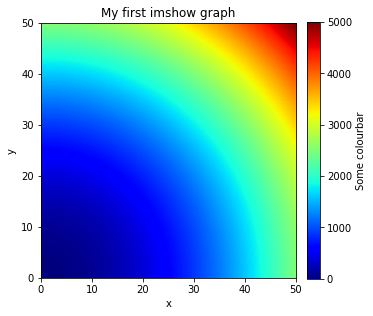

In [4]:
# Create some 2D data

x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Create a 2D array out of x and y

X, Y = np.meshgrid(x, y)

# For each point in (X, Y) create Z value

Z = X**2 + Y**2

# Create plot
plt.figure(figsize=(5,5))

# Create image plot
# Interpolation methods can be "nearest", "bilinear" and "bicubic"
# Matplotlib provides a range of colour maps (cmap kwarg)

plt.imshow(Z, interpolation='bilinear', cmap="jet",
               origin='lower', extent=[0, 50, 0, 50],
               vmax=np.max(Z), vmin=np.min(Z))

# Create colour bar
plt.colorbar(label="Some colourbar", fraction=0.046, pad=0.04)

# Add extras
plt.xlabel("x")
plt.ylabel("y")
plt.title("My first imshow graph")

# Display
plt.show()

(3d_plots)=
### 3D plots
``` {index} Plots: 3D
```

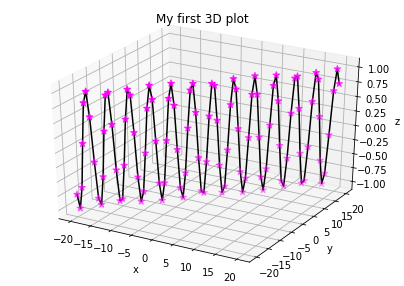

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create plot
fig = plt.figure(figsize=(7,5))

# Add subplot with 3D axes projection
ax = fig.add_subplot(111, projection='3d')

# Create some data
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
z = np.sin(x+y)

# Plot line and scatter data
ax.plot(x,y,z, color="k")
ax.scatter(x,y,z, marker="*", s=50, color="magenta")

# Add extras
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("My first 3D plot")

# Display
plt.show()

(Animations)=
### Animations
``` {index} Plots: Animations
```

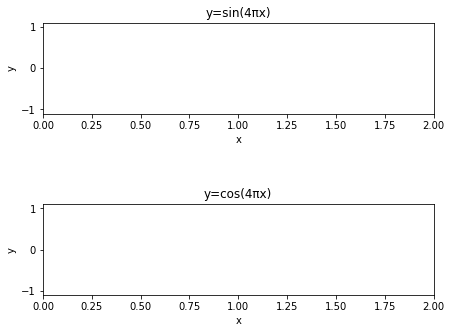

In [3]:
# import relevant modules for animation
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

# number of frames 
nframes = 200

# set up figure and axes
# in this case, plot 2 subplots in 2 rows and 1 column
fig, axes = plt.subplots(2,1, figsize=(7,5))

# customise element we want to animate
# in this case it is lines
line1, = axes[0].plot([], [], 'r', lw=2)
line2, = axes[1].plot([], [], 'b', lw=2)

# customise all axes
for ax in axes:
    ax.set_xlim(0,2)
    ax.set_ylim(-1.1,1.1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# customise individual axis
axes[0].set_title('y=sin(4πx)')
axes[1].set_title('y=cos(4πx)')
    
# make a list to store all elements we want to animate, to call them later
lines = [line1, line2]
    
# adjust space between graphs
plt.subplots_adjust(hspace=1)

# initialisation function plots the background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# animation function is called for in each frame to plot data
# call elements from list
def animate(i):
    
    x1 = np.linspace(0, 2*np.pi, nframes)
    y1 = np.sin(4*np.pi*(x1-(1/nframes)*i))
    lines[0].set_data(x1, y1)
    
    x2 = np.linspace(0, 2*np.pi, nframes)
    y2 = np.cos(4*np.pi*(x2-(1/nframes)*i))
    lines[1].set_data(x2, y2)
    
    return lines

# compile animation as 'anim'
# interval in milli-seconds
# blit=True only re-draws parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=20, blit=True)

In [4]:
# display anim using HTML in IPython.display 
# use ffmpeg to encode animation and render it as HTML5 video

HTML(anim.to_html5_video())

### Note on ffmpeg

FFmpeg is a free and open-source project with a collection of tools and libraries for decoding, encoding, transcoding, muxing, demuxing, streaming, filtering and playing multimedia files. 

Since ffmpeg is command-line-based, it can be used in different coding environments and programming languages, including Python.

If you're using __[Anaconda](https://www.anaconda.com/products/individual)__, you need to install the ffmpeg package with conda run. Run the following in an Anaconda prompt open inside a new repository:

```conda install -c menpo ffmpeg```